# Application of Machine Learning Tools for Music Composition

In [1]:
#Importing necessary functions
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from custom import read_midi, read_data, prepare_data, get_transition_matrix, generate_stochastic_music, pick_chord_probs
from custom import generate_music, convert_to_midi, cnn, lstm

Using TensorFlow backend.


# First-order Markov Chain

In [2]:
path = 'midi'
notes_, n_vocab, notes_dictionary = read_data(path)
transformed_notes = []
for i in notes_:
    transformed_notes.append(notes_dictionary[i])
    
trans = get_transition_matrix(transformed_notes,n_vocab) 

output_dir_mc = 'Markov chain'
start = np.random.choice(transformed_notes)
music = generate_stochastic_music(trans,start,notes_dictionary)
convert_to_midi(music,output_dir_mc)

Parsing midi/1.mid
252
Parsing midi/10.mid
282
Parsing midi/11.mid
236
Parsing midi/12.mid
210
Parsing midi/13.mid
76
Parsing midi/14.mid
198
Parsing midi/15.mid
201
Parsing midi/16.mid
204
Parsing midi/17.mid
119
Parsing midi/18.mid
242
Parsing midi/19.mid
255
Parsing midi/2.mid
74
Parsing midi/20.mid
216
Parsing midi/21.mid
170
Parsing midi/22.mid
173
Parsing midi/23.mid
183
Parsing midi/24.mid
114
Parsing midi/25.mid
121
Parsing midi/26.mid
119
Parsing midi/3.mid
274
Parsing midi/4.mid
184
Parsing midi/5.mid
121
Parsing midi/6.mid
183
Parsing midi/7.mid
141
Parsing midi/8.mid
180
Parsing midi/9.mid
290
unique chords 54


### Setting lookback parameter and preparing input sequences for the deep learning models

In [3]:
# path = 'final dataset/'
# notes_, n_vocab, notes_dictionary = read_data(path)
lookback = 30
batch_size =32
x, y = prepare_data(notes_, notes_dictionary, lookback)
x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

### Training LSTM model

In [4]:
model = lstm(n_vocab,lookback)
mc=ModelCheckpoint('lstm_best_model.h5', monitor='loss', mode='min', save_best_only=True,verbose=1)
lstm_history = model.fit(x_tr,y_tr,validation_data=(x_val,y_val),batch_size=batch_size,epochs=50,verbose=1, callbacks=[mc])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 128)           66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 54)                6966      
_________________________________________________________________
activation_2 (Activation)    (None, 54)                0         
Total params: 205,110
Trainable params: 205,110
Non-trainable params: 0
________________________________________________


Epoch 00031: loss improved from 2.05086 to 1.95152, saving model to lstm_best_model.h5
Epoch 32/50
3829/3829 [==============================] - 6s 1ms/step - loss: 1.8940 - accuracy: 0.4518 - val_loss: 2.0356 - val_accuracy: 0.4311

Epoch 00032: loss improved from 1.95152 to 1.89403, saving model to lstm_best_model.h5
Epoch 33/50
3829/3829 [==============================] - 6s 1ms/step - loss: 1.8235 - accuracy: 0.4604 - val_loss: 2.0031 - val_accuracy: 0.4332

Epoch 00033: loss improved from 1.89403 to 1.82353, saving model to lstm_best_model.h5
Epoch 34/50
3829/3829 [==============================] - 5s 1ms/step - loss: 1.7769 - accuracy: 0.4758 - val_loss: 1.9545 - val_accuracy: 0.4551

Epoch 00034: loss improved from 1.82353 to 1.77690, saving model to lstm_best_model.h5
Epoch 35/50
3829/3829 [==============================] - 5s 1ms/step - loss: 1.7372 - accuracy: 0.4821 - val_loss: 1.9229 - val_accuracy: 0.4520

Epoch 00035: loss improved from 1.77690 to 1.73716, saving model to

### Training 1DCNN model

In [5]:
model = cnn(n_vocab,lookback)
mc=ModelCheckpoint('cnn_best_model.h5', monitor='loss', mode='min', save_best_only=True,verbose=1)
cnn_history = model.fit(x_tr,y_tr,validation_data=(x_val,y_val),batch_size=batch_size,epochs=50,verbose=1, callbacks=[mc])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 7, 128)            24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 3, 128)           


Epoch 00027: loss improved from 2.31916 to 2.29723, saving model to cnn_best_model.h5
Epoch 28/50
3829/3829 [==============================] - 1s 202us/step - loss: 2.2650 - accuracy: 0.2860 - val_loss: 2.5798 - val_accuracy: 0.2255

Epoch 00028: loss improved from 2.29723 to 2.26504, saving model to cnn_best_model.h5
Epoch 29/50
3829/3829 [==============================] - 1s 217us/step - loss: 2.2423 - accuracy: 0.2797 - val_loss: 2.5773 - val_accuracy: 0.2182

Epoch 00029: loss improved from 2.26504 to 2.24227, saving model to cnn_best_model.h5
Epoch 30/50
3829/3829 [==============================] - 1s 171us/step - loss: 2.2232 - accuracy: 0.2925 - val_loss: 2.5813 - val_accuracy: 0.2213

Epoch 00030: loss improved from 2.24227 to 2.22317, saving model to cnn_best_model.h5
Epoch 31/50
3829/3829 [==============================] - 1s 248us/step - loss: 2.2125 - accuracy: 0.2881 - val_loss: 2.5544 - val_accuracy: 0.2234

Epoch 00031: loss improved from 2.22317 to 2.21248, saving mode

### Loading best LSTM model to predict new chords

In [6]:
model = load_model('lstm_best_model.h5')

start = np.random.randint(0, len(x_val)-1)
random_start_sequence = x_val[start]

output_dir_lstm = 'lstm_output'
music = generate_music(model, notes_dictionary, lookback, random_start_sequence)
convert_to_midi(music,output_dir_lstm)

### Loading best 1DCNN model to predict new chords

In [7]:
model = load_model('cnn_best_model.h5')

start = np.random.randint(0, len(x_val)-1)
random_start_sequence = x_val[start]

output_dir_cnn = 'cnn_output'
music = generate_music(model, notes_dictionary, lookback, random_start_sequence)
convert_to_midi(music,output_dir_cnn)

### Training loss for both the deep learning models

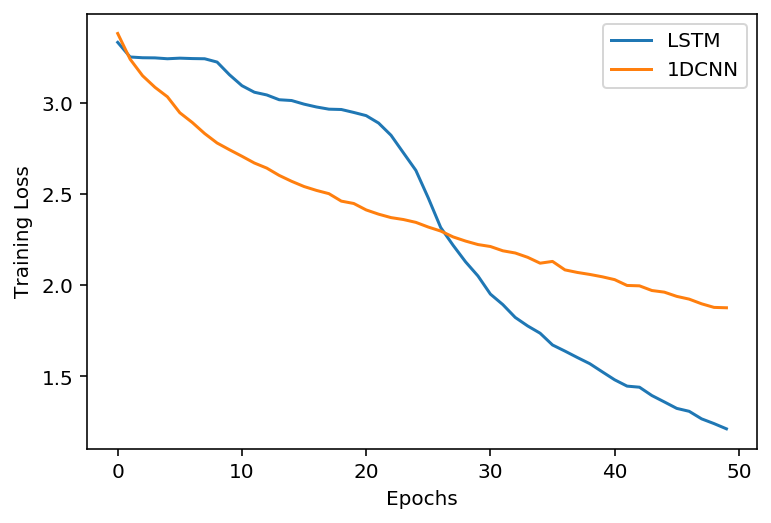

In [8]:
plt.plot(lstm_history.history['loss'],label='LSTM')
plt.plot(cnn_history.history['loss'],label='1DCNN')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Test set accuracy for both the deep learning models

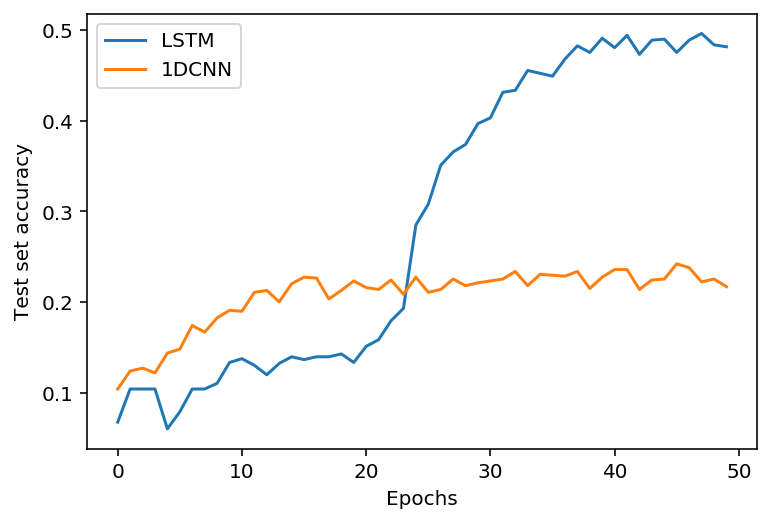

In [9]:
plt.plot(lstm_history.history['val_accuracy'],label='LSTM')
plt.plot(cnn_history.history['val_accuracy'],label='1DCNN')
plt.xlabel('Epochs')
plt.ylabel('Test set accuracy')
plt.legend()
plt.show()